# Import Libraries and Data
First, let's import necessary libraries: pandas, seaborn, matplotlib.pyplot, numpy.

Import the data as a DataFrame called racehorses. There are 8 columns and 8987 rows. All the values are stored as strings. This short preliminary analysis shows that the data needs some cleaning, inluding changes in data types and in the records themselves. 

In [1]:
# Import libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a DataFrame.
racehorses = pd.read_csv('horseracing_data.csv')
racehorses.head()

,data,tor,dystans,kat.,jeździec,waga,trener,mc,wygrana
0,13.05.2018,Warszawa,2000 m,B,dż. T. Lukašek,61,W. Olkowski,1 / 7,20 000 zł
1,24.09.2017,Warszawa,2600 m,G1 A,dż. T. Lukašek,55,W. Olkowski,1 / 5,126 000 zł
2,27.08.2017,Warszawa,2800 m,L A,dż. T. Lukašek,54½,W. Olkowski,1 / 5,54 000 zł
3,02.07.2017,Warszawa,2400 m,G1,dż. T. Lukašek,59,W. Olkowski,1 / 17,100 000 zł
4,11.06.2017,Warszawa,2200 m,L A,dż. T. Lukašek,59,W. Olkowski,2 / 8,13 200 zł


In [3]:
racehorses.shape

(8987, 9)

In [4]:
racehorses.dtypes

data        object
tor         object
dystans     object
kat.        object
jeździec    object
waga        object
trener      object
mc          object
wygrana     object
dtype: object

# Data Cleaning
The most important task is to change the data types. However, to achive this, the columns should be cleaned: 1) translate column names to English; 2) remove ' m' from 'dystans' and 'zł ' from 'wygrana'; 3) replace the 'mc' column, with the structure 'place / out of', with two columns, named 'place' and 'out_of' accordingly; 4) change fractions written with a '/' to decimal fractions; 5) create a new column, 'jockey_category', to store jockey categories, now listed along with the name of the jockey in 'jeździec'. Only then will it be possible to change the column types to appropriate ones.

I've encountered the problem while executing point 3): 17 records contain a letter 'D' instead of the number of place taken by a given horse. The letter probably means that a horse was disqualified. However, there are also instances of place '0', which also means disqualification. As I am not sure what exactly the letter means, and since there are only 17 appearances of it in the entire DataFrame, I decided to drop these rows. This leaves me with a DataFrame containing 9870 records.

The last part of the data cleaning process is to create a column that would store jockey categories. In Poland, each professional jockey is assigned a category, based on how many races he or she has won:
u. - uczeń (a jockey who did not win more than 10 races)
st. u. - starszy uczeń (a jockey who did not win more than 25 races)
pr. dż. - praktykant dżokejski (a jockey who did not win more than 50 races)
k. dż. - kandydat dżokejski (a jockey who did not win more than 100 races)
dż. - dżokej (a jockey who won 100 races or more)

Moreover, there are two types of amateour riders: am. dż (amator dżokej) and am. u. (amator uczeń). The distinction is not very clear; however, 'amator dżokej' has probably won more races than 'amator uczeń'.

The terms are left in Polish, as in English-speaking countries there is no such detailed distinction between jockey categories.

In [5]:
# Rename the columns.
racehorses = racehorses.rename(columns={"data":"date",
                                        "tor":"track",
                                        "dystans":"distance",
                                        "kat.":"category",
                                        "jeździec":"jockey",
                                        "waga":"weight",
                                        "trener":"coach",
                                        "wygrana":"wins"})

In [6]:
# Remove any non-digit characters from the 'wins' and 'distance' columns 
# and change their type to integer.
racehorses['wins'] = (racehorses.wins.str
                      .replace(r"\D+", "", regex=True)
                      .astype('int'))
racehorses['distance'] = (racehorses.distance.str
                          .replace(r"\D+", "", regex=True)
                          .astype('int'))

In [7]:
# Create two columns, 'place' and 'out_of' from the 'mc' column 
# and change their type to integer.
racehorses['place'] = racehorses.mc.apply(lambda x: x.split(' / ')[0])
racehorses['out_of'] = racehorses.mc.apply(lambda x: x.split(' / ')[1]).astype('int')
racehorses.head()

,date,track,distance,category,jockey,weight,coach,mc,wins,place,out_of
0,13.05.2018,Warszawa,2000,B,dż. T. Lukašek,61,W. Olkowski,1 / 7,20000,1,7
1,24.09.2017,Warszawa,2600,G1 A,dż. T. Lukašek,55,W. Olkowski,1 / 5,126000,1,5
2,27.08.2017,Warszawa,2800,L A,dż. T. Lukašek,54½,W. Olkowski,1 / 5,54000,1,5
3,02.07.2017,Warszawa,2400,G1,dż. T. Lukašek,59,W. Olkowski,1 / 17,100000,1,17
4,11.06.2017,Warszawa,2200,L A,dż. T. Lukašek,59,W. Olkowski,2 / 8,13200,2,8


In [8]:
# Trying to change the data type of the 'place' column returns an error: 
# invalid literal for int() with base 10: 'D'.
# Let's check what causes the problem.
racehorses['place'].str.contains('D').sum()

17

In [9]:
# Drop the rows with the 'D' letter in 'place'.
d_problem = racehorses[racehorses['place'].str.contains('D')].index
racehorses.drop(d_problem, inplace=True)
racehorses['place'] = racehorses.place.astype('int')
racehorses = racehorses.drop('mc', axis=1)

In [10]:
# Change the data type of the 'weight' column to float.
racehorses["weight"] = racehorses.weight.apply(lambda x: str(x).replace("½", ".5")).astype('float')

In [11]:
# Change the data type of the 'date' column to datetime.
racehorses['date'] = pd.to_datetime(racehorses['date'])

In [12]:
# Change the data type of the 'category' and 'track' columns to category.
racehorses['category'] = racehorses.category.fillna('no category')
racehorses['category'] = racehorses.category.astype('category')
racehorses['track'] = racehorses.track.astype('category')

In [13]:
# create the jockey_category colum
racehorses['jockey_category'] = racehorses['jockey']
racehorses.loc[racehorses['jockey_category'].str.startswith(' st. u. '), 'jockey_category'] = 'st.u.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' am. u. '), 'jockey_category'] = 'am.u.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' u. '), 'jockey_category'] = 'u.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' am. dż. '), 'jockey_category'] = 'am.dż.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' pr. dż. '), 'jockey_category'] = 'pr.dż.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' k. dż. '), 'jockey_category'] = 'k.dż.'
racehorses.loc[racehorses['jockey_category'].str.startswith(' dż. '), 'jockey_category'] = 'dż.'
racehorses.loc[racehorses['jockey_category'].str.len() > 7, 'jockey_category'] = np.nan
racehorses['jockey_category'] = racehorses['jockey_category'].fillna('no category')
racehorses['jockey_category'] = racehorses.jockey_category.astype('category')
racehorses.jockey_category.value_counts()

dż.            5535
k.dż.          1031
st.u.           884
pr.dż.          882
u.              585
no category      37
am.dż.            8
am.u.             8
Name: jockey_category, dtype: int64

In [14]:
# Remove jockey categories from 'jockey'.
jockey_categories = [' st. u. ', ' pr. dż. ', ' k. dż. ', ' am. dż. ', ' am. u. ', ' dż. ', ' u. ']
for cat in jockey_categories:
    racehorses['jockey'] = racehorses.jockey.str.replace(cat, '', regex=True)
racehorses['jockey'] = racehorses.jockey.str.lstrip()

In [15]:
# Check if every data type has been changed correctly.
print(racehorses.shape)
print(racehorses.dtypes)

(8970, 11)
date               datetime64[ns]
track                    category
distance                    int32
category                 category
jockey                     object
weight                    float64
coach                      object
wins                        int32
place                       int32
out_of                      int32
jockey_category          category
dtype: object


In [16]:
# View the data.
racehorses.head()

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category
0,2018-05-13,Warszawa,2000,B,T. Lukašek,61.0,W. Olkowski,20000,1,7,dż.
1,2017-09-24,Warszawa,2600,G1 A,T. Lukašek,55.0,W. Olkowski,126000,1,5,dż.
2,2017-08-27,Warszawa,2800,L A,T. Lukašek,54.5,W. Olkowski,54000,1,5,dż.
3,2017-02-07,Warszawa,2400,G1,T. Lukašek,59.0,W. Olkowski,100000,1,17,dż.
4,2017-11-06,Warszawa,2200,L A,T. Lukašek,59.0,W. Olkowski,13200,2,8,dż.


In [17]:
racehorses.describe()

,distance,weight,wins,place,out_of
count,8970.000000,8965.000000,8970.000000,8970.000000,8970.000000
mean,1845.664326,58.940268,2665.802341,4.349275,8.320178
std,763.032336,3.570328,6140.493349,2.710812,2.196563
min,0.000000,42.000000,0.000000,0.000000,0.000000
25%,1400.000000,57.000000,0.000000,2.000000,7.000000
50%,1600.000000,59.000000,800.000000,4.000000,8.000000
75%,2000.000000,60.000000,2800.000000,6.000000,10.000000
max,5500.000000,72.000000,126000.000000,18.000000,18.000000


In [18]:
racehorses.isna().sum()

date               0
track              0
distance           0
category           0
jockey             0
weight             5
coach              0
wins               0
place              0
out_of             0
jockey_category    0
dtype: int64

# Data Analysis
This analysis aims to answer the following quesions along with some additional questions:
1. What is the distribution of races during the year?
2. What are the ranges of wins for every place? How does this change based on the race category?
3. What is the distribution of places taken by different jockeys?
4. What jockey categories participate in various types of races?
5. Who is the most successfull coach?
6. Which jockey accumulated the highest prize?

### 1. What is the distribution of races during the year?
Races take place during the whole year, with peak months between April and November. This corresponds to the rseason on Polish tracks. The abroad races make up a small percent of all races listed in this dataset.

In [87]:
racehorses['month'] = racehorses['date'].dt.month_name()
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
racehorses['month'] = pd.Categorical(racehorses['month'], categories=months, ordered=True)

In [88]:
# Create a new column for Polish and abroad tracks.
polish = ['Kraków', 'Sopot', 'Warszawa', 'Wrocław']

conditions = [
    (racehorses['track'].isin(polish)),
    (~racehorses['track'].isin(polish))
    ]

values = ['Poland', 'abroad']

racehorses['country_track'] = np.select(conditions, values)

In [89]:
# Create a new column for flat and jumping races.
jumping = ['steeple', 'płoty']

conditions = [
    (racehorses['category'].isin(jumping)),
    (~racehorses['category'].isin(jumping))
]

values = ['jumping', ['flat']]

racehorses['race_cat'] = np.select(conditions, values)

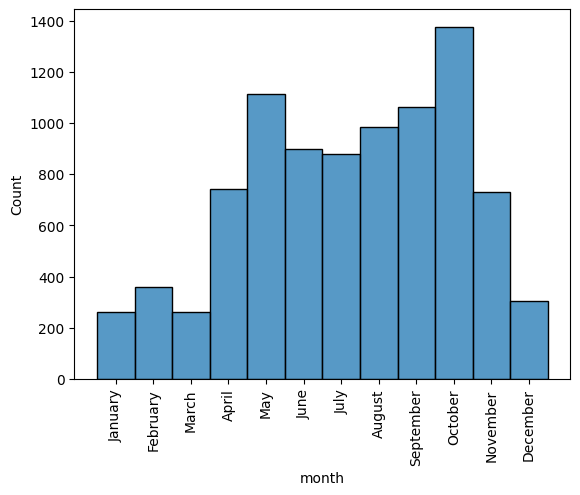

In [90]:
sns.histplot(data=racehorses, x="month")
plt.xticks(rotation=90)
plt.show()

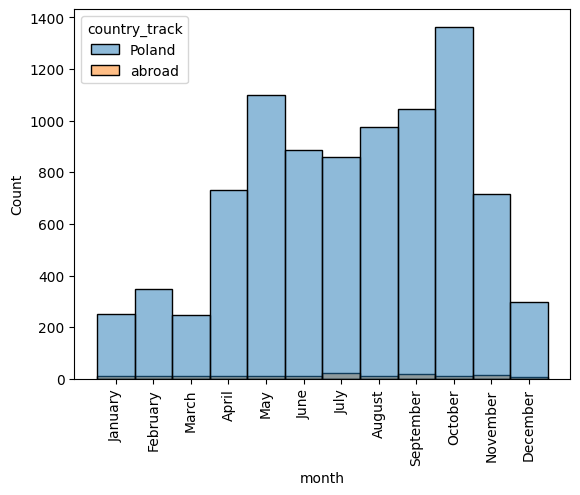

In [91]:
sns.histplot(data=racehorses, x="month", hue="country_track")
plt.xticks(rotation=90)
plt.show()

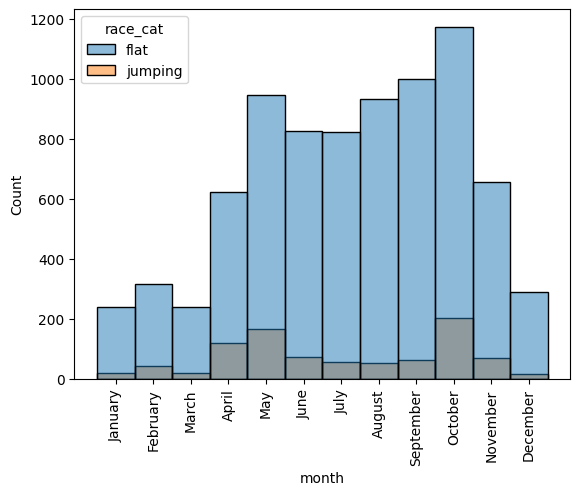

In [92]:
sns.histplot(data=racehorses, x="month", hue="race_cat")
plt.xticks(rotation=90)
plt.show()

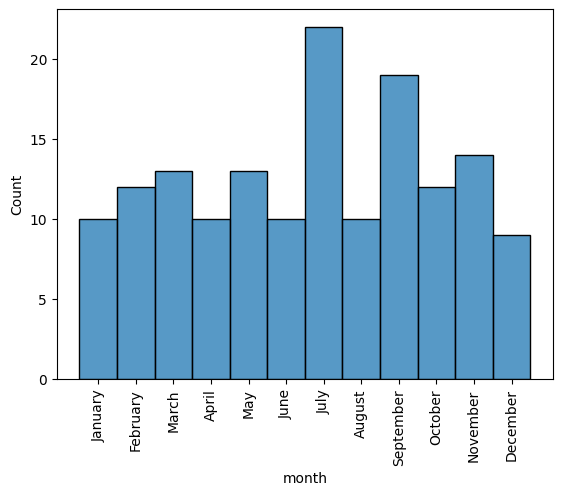

In [93]:
abroad = racehorses[racehorses['country_track'] == 'abroad'].copy()

sns.histplot(data=abroad, x="month")
plt.xticks(rotation=90)
plt.show()

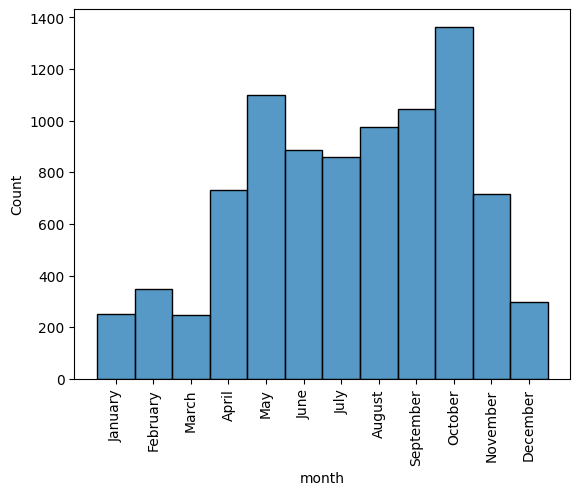

In [94]:
poland = racehorses[racehorses['country_track'] == 'Poland'].copy()

sns.histplot(data=poland, x="month")
plt.xticks(rotation=90)
plt.show()

### 2. What are the ranges of wins for every place? How does this change based on the race category?
There was one race on 14 July 2018 with prize pool of 0 zł; this race was excluded in the calculation of the prize ranges for every place, as well as calculation of the mean prize for each place.

What is interesting, it is possible to win money prize even if a horse did not finish the race. All such instances regard races with no category or category "steeple", "płoty". 

In [50]:
racehorses.head()

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category,month,country_track,race_cat
0,2018-05-13,Warszawa,2000,B,T. Lukašek,61.0,W. Olkowski,20000,1,7,dż.,May,Poland,flat
1,2017-09-24,Warszawa,2600,G1 A,T. Lukašek,55.0,W. Olkowski,126000,1,5,dż.,September,Poland,flat
2,2017-08-27,Warszawa,2800,L A,T. Lukašek,54.5,W. Olkowski,54000,1,5,dż.,August,Poland,flat
3,2017-02-07,Warszawa,2400,G1,T. Lukašek,59.0,W. Olkowski,100000,1,17,dż.,February,Poland,flat
4,2017-11-06,Warszawa,2200,L A,T. Lukašek,59.0,W. Olkowski,13200,2,8,dż.,November,Poland,flat


In [51]:
racehorses.groupby('place')['wins'].mean()

place
0       817.405512
1     10965.003359
2      4422.990932
3      2454.371548
4      1373.290523
5       678.534234
6        36.243133
7        10.322581
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
Name: wins, dtype: float64

In [52]:
racehorses.groupby('place')['wins'].min()

place
0       0
1       0
2     640
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
Name: wins, dtype: int32

In [55]:
racehorses[(racehorses['wins'] == 0) & (racehorses['place'] == 1)]

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category,month,country_track,race_cat
5325,2018-07-14,Sopot,1400,IV,C. Fraisl,63.0,M. Romanowski,0,1,8,dż.,July,Poland,flat


In [56]:
racehorses[(racehorses['track'] == 'Sopot') & 
          (racehorses['distance'] == 1400) &
          (racehorses['category'] == 'IV') &
          (racehorses['date'] == '2018-07-14')]

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category,month,country_track,race_cat
2708,2018-07-14,Sopot,1400,IV,R. Kułaga,63.0,M. Borkowski,0,4,8,st.u.,July,Poland,flat
2922,2018-07-14,Sopot,1400,IV,V. Popov,59.0,A. Laskowski,0,6,8,dż.,July,Poland,flat
4467,2018-07-14,Sopot,1400,IV,D. Petryakov,59.0,K. Rogowski,0,7,8,dż.,July,Poland,flat
5325,2018-07-14,Sopot,1400,IV,C. Fraisl,63.0,M. Romanowski,0,1,8,dż.,July,Poland,flat
5718,2018-07-14,Sopot,1400,IV,P. Stepakin,63.0,E. Porębna,0,8,8,pr.dż.,July,Poland,flat
6936,2018-07-14,Sopot,1400,IV,A. Turgaev,59.0,I. Wróblewska,0,3,8,dż.,July,Poland,flat
7964,2018-07-14,Sopot,1400,IV,M. Kryszyłowicz,60.0,W. Kryszyłowicz,0,5,8,dż.,July,Poland,flat


In [57]:
racehorses[racehorses['wins'] != 0].groupby('place')['wins'].min()

place
0     600
1    2900
2     640
3     448
4     320
5     145
6     300
7    4000
Name: wins, dtype: int32

In [54]:
racehorses.groupby('place')['wins'].max()

place
0      31975
1     126000
2      50400
3      25200
4      16000
5      12000
6      10445
7       4000
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
Name: wins, dtype: int32

In [58]:
racehorses[racehorses['wins'] != 0].groupby('place')['wins'].mean()

place
0     8650.875000
1    10974.217647
2     4422.990932
3     2456.427136
4     1375.727595
5      680.373080
6     5937.833333
7     4000.000000
Name: wins, dtype: float64

In [60]:
pivot_table = pd.pivot_table(racehorses, values='wins', index=['category'],
                    columns=['place'], aggfunc=np.max)
pivot_table

place,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
category,,,,,,,,,,,,,,,,,,,
A,NaN,100000.0,16000.0,20000.0,3500.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
B,0.0,31000.0,9600.0,4800.0,4000.0,1150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
G1,NaN,100000.0,40000.0,20000.0,10000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
G1 A,NaN,126000.0,50400.0,25200.0,12600.0,6300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G3 A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,0.0,15500.0,4400.0,3100.0,1550.0,775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
II,0.0,9500.0,4400.0,2800.0,2100.0,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
III,0.0,8000.0,3200.0,2400.0,1800.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
IV,0.0,6900.0,6000.0,2400.0,1380.0,800.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


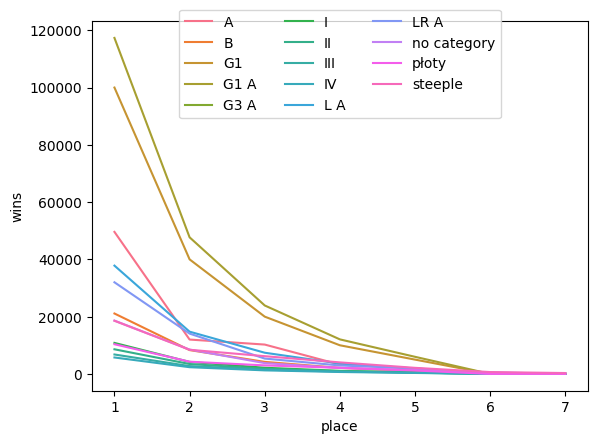

In [62]:
prized = racehorses[(racehorses['place'] > 0) & (racehorses['place'] < 8)].copy()


sns.lineplot(data=prized, x="place", y='wins', hue="category", errorbar=None)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True)
plt.show()

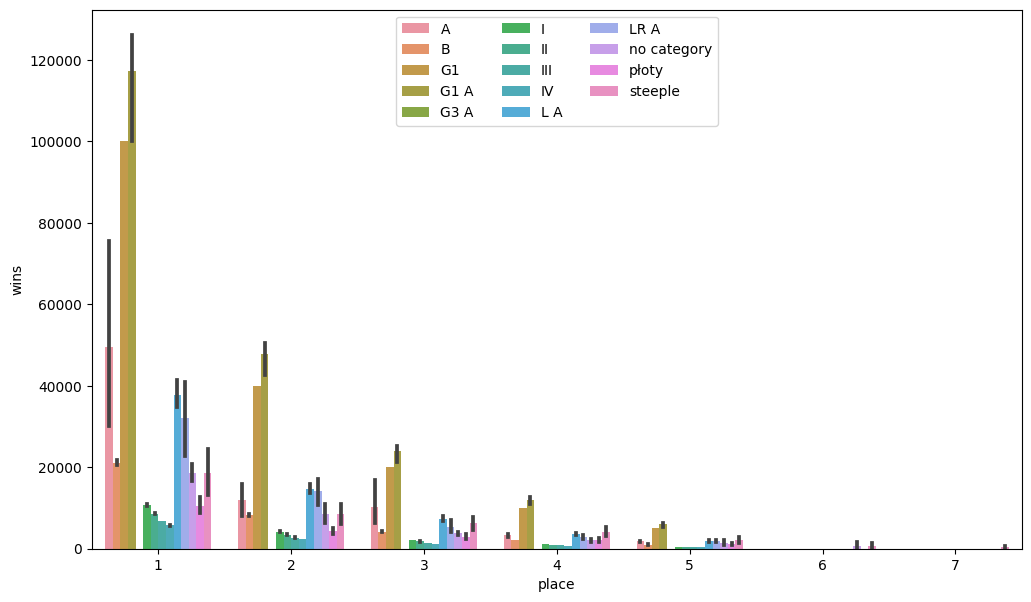

In [100]:
prized = racehorses[(racehorses['place'] > 0) & (racehorses['place'] < 8)].copy()

fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=prized, x="place", y='wins', hue="category")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=3, fancybox=True)
plt.show()

In [101]:
# Races where not finishing a race did not mean no wins.

racehorses[(racehorses['wins'] > 0) & (racehorses['place'] == 0)]

,date,track,distance,category,jockey,weight,coach,wins,place,out_of,jockey_category,month,country_track,race_cat,year
247,2017-02-09,Praga,1400,no category,A. Fresu,59.0,M. Kacprzyk,10445,0,16,dż.,February,abroad,flat,2017
337,2018-09-30,Merano,3000,no category,M. Miksovsky,67.5,R. Świątek,6783,0,8,st.u.,September,abroad,flat,2018
1681,2018-01-07,Karlovy Vary,3200,steeple,R. Benš,70.0,I. Wróblewska,1472,0,7,no category,January,abroad,jumping,2018
1683,2018-12-05,Most,3800,steeple,S. Ferhanov,70.5,I. Wróblewska,2209,0,7,no category,December,abroad,jumping,2018
2752,2018-09-30,Tours,2200,no category,A. Pouchin,55.0,P. Gluza,2297,0,10,dż.,September,abroad,flat,2018
3616,2017-12-08,Hoppegarten,1200,no category,B. Murzabayev,NaN,W. Olkowski,24257,0,2,dż.,December,abroad,flat,2017
3618,2017-07-26,Hoppegarten,1200,no category,B. Murzabayev,NaN,W. Olkowski,14333,0,2,dż.,July,abroad,flat,2017
3648,2018-07-21,Bad Harzburg,4000,steeple,M. Quinlan,67.5,R. Świątek,2089,0,5,dż.,July,abroad,jumping,2018
3649,2018-05-07,Hamburg,3600,steeple,M. Quinlan,66.0,R. Świątek,4177,0,8,dż.,May,abroad,jumping,2018
4151,2017-07-10,Drezno,2200,no category,St. Hellyn,55.0,D. Mioduszewski,882,0,12,dż.,July,abroad,flat,2017


### 3. What is the distribution of places taken by jockeys with different categories?
Jockeys with the "dżokej" are participating in races most frequently, so it is no surprise that they win most often. Although the boxplot displayed below shows that the most efficient are riders with "am.u." ("amator uczeń", non-professional riders with less than 100 wins), such riders make only 0.1% of all riders (7 occurrences in total). Similar situation is for riders with "am.dż" category or no cateogry. Therefore, their results should not be taken into consideration, as they cannot tell us anything about more general trends. All other categories, though not equally distributed, have at least several hundreds occurrences.

What is interesting, the median for "dż.", "k.dż.", "pr.dż.", "st.u.", and "u." is the same and equals to 4. "St.u." and "u.", representing the least experienced jockeys, are not likely to take the first or second place. "Dż." and "k.dż.", the most experienced ones, tend to score better than others. "Pr.dż" are equally likely to take places 2 and 3 as 5 and 6.

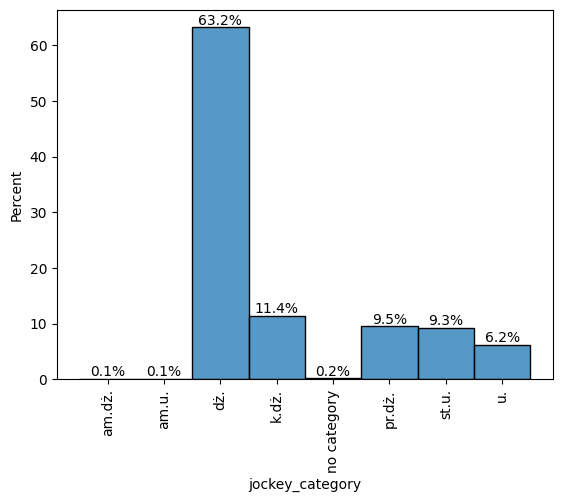

In [64]:
# Jockey category distribution - percentages.
ax = sns.histplot(data=prized, x='jockey_category', stat='percent')
for container in ax.containers:
    labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels)
plt.xticks(rotation=90)
plt.show()

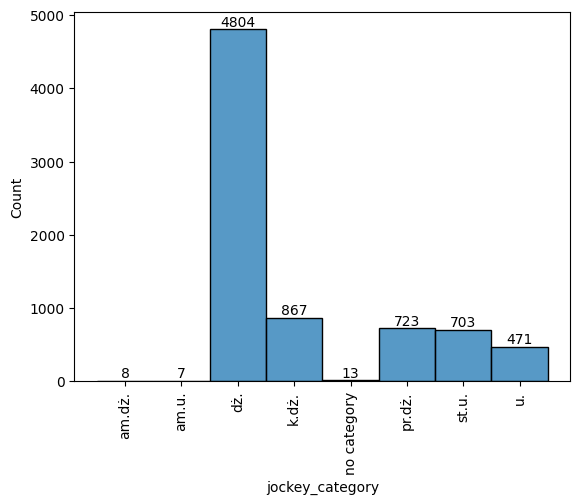

In [65]:
# Jockey category distribution - counts.
ax = sns.histplot(data=prized, x='jockey_category')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

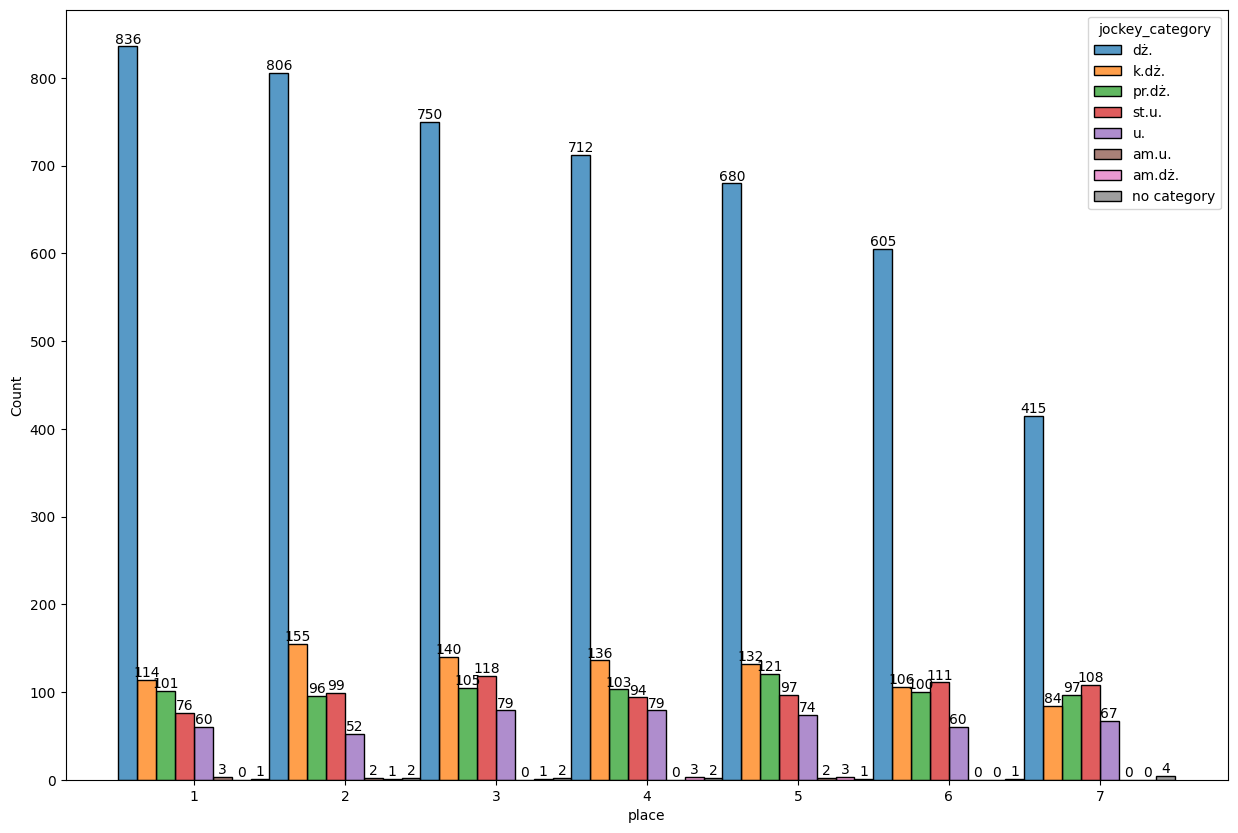

In [66]:
# Distribution of places taken by different jockey categories.
order = ['dż.', 'k.dż.', 'pr.dż.', 'st.u.', 'u.', 'am.u.', 'am.dż.', 'no category']

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.histplot(data=prized, x="place", 
                  discrete=True, 
                  hue="jockey_category",
                  multiple='dodge', 
                  legend=True,
                  hue_order=order)
plt.xticks([1,2,3,4,5,6,7])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

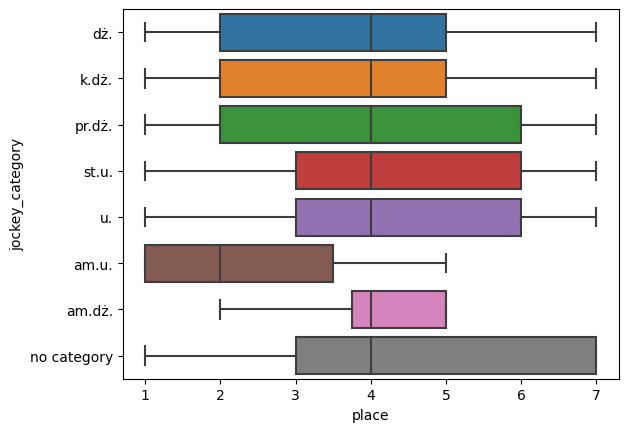

In [67]:
# Distribution of places taken by different jockey categories.
sns.boxplot(data=prized, x='place', y='jockey_category', 
            order=order)
plt.show()

### 4. What jockey categories participate in various types of races?
Most of the riders take part in flat races, which is understantable as this kind of race is staged most often. In both flat and jumping races the frequency of jockey categories reflects the order of categories: "dż." is the most experienced one, followed by "k.dż.", "pr.dż.", "st.u", "u.", "am.dż" and "am.u.". This can mean two things: 1) riders with higher categories take part in races more often or 2) there are more riders with higher categories. The first option is rather predictible: categories depend on the number of races won, so riders with higher categories are more likely to win. This results in coaches being more eager to assign them more horses. On the other hand, the second option would be alarming, as it implies that the sport is getting less popular, with less people willing to become jockeys. 

In [68]:
jock_cat_per_race_cat = racehorses.groupby('race_cat')['jockey_category'].value_counts()
jock_cat_per_race_cat

race_cat  jockey_category
flat      dż.                5120
          k.dż.               891
          pr.dż.              791
          st.u.               755
          u.                  489
          no category          17
          am.u.                 3
          am.dż.                2
jumping   dż.                 415
          k.dż.               140
          st.u.               129
          u.                   96
          pr.dż.               91
          no category          20
          am.dż.                6
          am.u.                 5
Name: jockey_category, dtype: int64

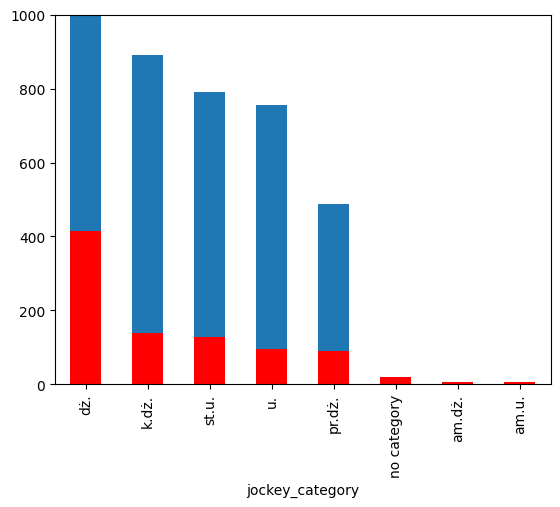

In [69]:
fig, ax = plt.subplots()
jock_cat_per_race_cat['flat'].plot(kind='bar', ax=ax)
jock_cat_per_race_cat['jumping'].plot(kind='bar', ax=ax, color='red')
plt.ylim(top=1000)
plt.show()

### 5. Who is the most successfull coach?
In this case, "the most successfull" coach means the coach who has won the most races. It is A. Wyrzyk, with 140 wins, followed by K. Ziemiański (110) and W.Olkowski (88).

In [75]:
(
    racehorses[racehorses['place'] == 1]
    .groupby('coach')['place']
    .value_counts()
    .sort_values(ascending=False)
)

coach               place
A. Wyrzyk           1        140
K. Ziemiański       1        110
W. Olkowski         1         88
M. Borkowski        1         83
M. Janikowski       1         82
R. Świątek          1         54
M. Jodłowski        1         53
K. Rogowski         1         51
J. Kozłowski        1         49
P. Piątkowski       1         43
M. Łojek            1         40
A. Walicki          1         36
E. Zahariev         1         35
T. Dębowski         1         29
A. Zielińska        1         23
M. Romanowski       1         22
E. Porębna          1         21
N. Szelągowska      1         20
W. Kryszyłowicz     1         19
P. Poles            1         16
J. Siwonia          1         14
M. Kacprzyk         1         13
M. Krzyśków         1         11
W. Szymczuk         1         10
R. Bodlak           1         10
I. Wróblewska       1          8
M. Boruta           1          8
T. Pastuszka        1          8
R. Piwko            1          8
K. Urbańczyk     

### 6. Which jockey accumulated the highest prize?
The jockey who won the largest sum over the years is S. Mazur (2,753,644 zł), followed by T. Lukašek (2,003,315 zł) and M. Abik (1,785,870 zł). It should be noticed, though, that the prize is split between the jockey, coach and owner of the horse, with jockeys usually earning the least percentage of the whole prize.

In [78]:
(
racehorses[racehorses['wins'] != 0]
    .groupby('jockey')['wins']
    .sum()
    .sort_values(ascending=False)
)

jockey
S. Mazur            2753644
T. Lukašek          2003315
M. Abik             1785870
A. Reznikov         1352285
M. Srnec            1156515
                     ...   
I. Museibov             350
J. Kowalczyk            300
M. Pilich               200
Aleksandra Gajos        195
J. Ochocki              145
Name: wins, Length: 218, dtype: int32